In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

dataset = load_dataset("stanfordnlp/sst2")

train_texts = dataset['train']['sentence']
train_labels = dataset['train']['label']
test_texts = dataset['validation']['sentence']
test_labels = dataset['validation']['label']

In [22]:
vocab_size = 20000
max_length = 50

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<UNK>")
tokenizer.fit_on_texts(train_texts)

X_train = tokenizer.texts_to_sequences(train_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [23]:
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.5575 - loss: 0.6878 - val_accuracy: 0.5559 - val_loss: 0.6874
Epoch 2/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5605 - loss: 0.6846 - val_accuracy: 0.7781 - val_loss: 0.4764
Epoch 3/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8282 - loss: 0.4099 - val_accuracy: 0.8886 - val_loss: 0.2740
Epoch 4/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9283 - loss: 0.1968 - val_accuracy: 0.9079 - val_loss: 0.2505
Epoch 5/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9560 - loss: 0.1230 - val_accuracy: 0.9182 - val_loss: 0.2389
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8102 - loss: 0.5112
Test Accuracy: 0.8028


In [25]:
example="the quality of games on steam has really gone down"
print("example text: "+example)
example=tokenizer.texts_to_sequences([example])
example=pad_sequences(example, maxlen=max_length, padding="post")
pred = model.predict(example)[0][0]
if pred >= 0.5:
        print(f"Positive sentiment ({pred:.3f})")
else:
        print(f"Negative sentiment ({pred:.3f})")

example text: the quality of games on steam has really gone down
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Negative sentiment (0.210)


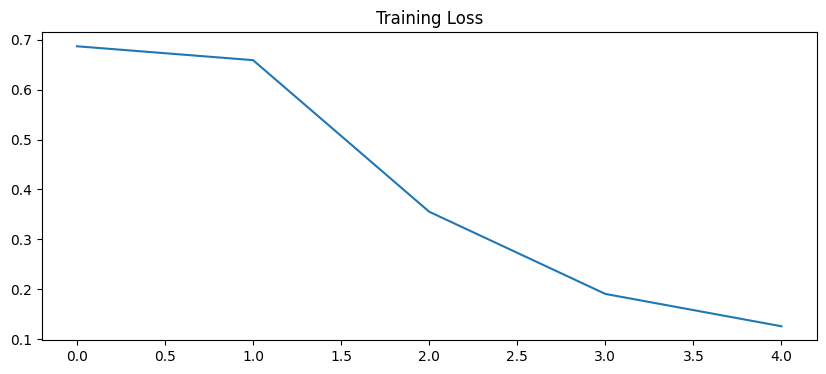

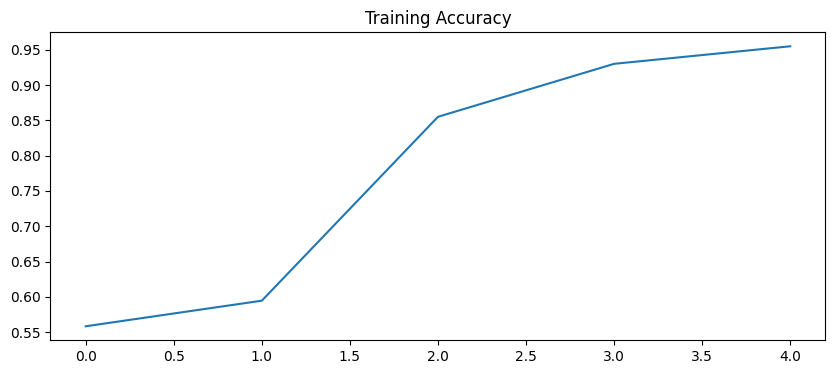

In [29]:
plt.figure(figsize=(10,4))
plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history["accuracy"])
plt.title("Training Accuracy")
plt.show()